# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [170]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [171]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [172]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [173]:
df_train.shape

(15223, 52)

In [174]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [175]:
df_test.shape

(14910, 52)

In [176]:
df_train.head(30)

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN
5,59911784,0,29,1,0,0,0,0,Среднее,Гражданский брак,...,0,1,2,1,11,0,0,0,0,NaN
6,59911832,0,35,1,0,0,1,1,Высшее,Разведен(а),...,0,1,2,2,14,0,0,0,0,NaN
7,59912034,0,41,1,0,1,0,0,Среднее,Состою в браке,...,1,1,2,1,11,0,0,0,0,NaN
8,59912560,0,53,1,0,0,2,0,Высшее,Состою в браке,...,0,1,1,1,3,0,0,0,0,NaN
9,59912659,0,43,1,0,1,0,0,Среднее специальное,Состою в браке,...,0,1,1,1,6,0,0,0,0,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [177]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [178]:
df = df_test.append(df_train).reset_index(drop=True)

In [179]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [181]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Высшее', 'Среднее специальное', 'Неполное среднее', 'Неоконченное высшее', 'Ученая степень', 'Два и более высших образования', 'Среднее'}


MARITAL_STATUS
{'Состою в браке', 'Вдовец/Вдова', 'Не состоял в браке', 'Гражданский брак', 'Разведен(а)'}


GEN_INDUSTRY
{nan, 'Здравоохранение', 'Страхование', 'Управляющая компания', 'Нефтегазовая промышленность', 'Энергетика', 'Ресторанный бизнес/Общественное питание', 'Торговля', 'Туризм', 'СМИ/Реклама/PR-агенства', 'Строительство', 'Маркетинг', 'Развлечения/Искусство', 'Коммунальное хоз-во/Дорожные службы', 'Металлургия/Промышленность/Машиностроение', 'Сборочные производства', 'Подбор персонала', 'Недвижимость', 'Государственная служба', 'Юридические услуги/нотариальные услуги', 'Химия/Парфюмерия/Фармацевтика', 'Сельское хозяйство', 'Информационные технологии', 'Наука', 'ЧОП/Детективная д-ть', 'Салоны красоты и здоровья', 'Информационные услуги', 'Банк/Финансы', 'Логистика', 'Другие сферы', 'Образование', 'Транспорт'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [182]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [183]:
df.info()
#пропуски в данных есть например в столбцах
# GEN_INDUSTRY                  27420 non-null object
# GEN_TITLE                     27420 non-null object
# ORG_TP_STATE                  27420 non-null object
# ORG_TP_FCAPITAL               27425 non-null object
# JOB_DIR                       27420 non-null object
# что с ними можно сделать: a) убрать строки где есть пропуски б) выбрать среднее значение в) записать как параметр данных(може быть те кто не указал данные будет заинтересован в предожение банка)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [184]:
да есть например образование, их можно разбить на столбцы функцией pd.get_dummies

SyntaxError: invalid syntax (<ipython-input-184-af0f254390f5>, line 1)

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [185]:

def preproc_data(df_input):
    df_output = df_input.copy()
    df_output=df_output.drop(['AGREEMENT_RK'],axis=1)
    list_to_change=['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']
    for name in list_to_change:
        df_output[name]=df_output[name].map(lambda x: x.replace(',', '.')).astype('float')
    data_with_NA =['GEN_INDUSTRY','GEN_TITLE','ORG_TP_STATE','ORG_TP_FCAPITAL','JOB_DIR','TP_PROVINCE','WORK_TIME','PREVIOUS_CARD_NUM_UTILIZED']
    for column in data_with_NA:
        df_output = df_output.drop([column], axis=1)
    for i in df_output.columns[0:-1]: # перебираем все столбцы
        if (str(df_output[i].dtype) == 'object'): # если тип столбца - object
            df_output = pd.get_dummies(df_output, columns=[i])
    #print(df_output.columns.values)
    return df_output
preproc_data(df).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Columns: 312 entries, TARGET to REGION_NM_ЮЖНЫЙ
dtypes: float64(5), int64(31), object(1), uint8(275)
memory usage: 16.4+ MB


In [186]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [187]:
X=df_train_preproc.drop(['TARGET'], axis=1)
X_Test=df_test_preproc.drop(['TARGET'], axis=1)
y=df_train_preproc['TARGET']
y_Test=df_test_preproc['TARGET']

#### Задание 5. Обучение и оценка качества разных моделей

In [188]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [189]:
X_test.shape

(5024, 310)

In [190]:
y_test.shape

(5024,)

In [247]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score,precision_score,recall_score

## Your Code Here


rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict = rfc.predict(X_test)
predict_proba = rfc.predict_proba(X_test)
print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))


predict_proba = rfc.predict_proba(X_test)

# rfc = RandomForestClassifier()
# rfc.fit(X_train, y_train)
# predict = rfc.predict(X_test)
# print('RandomForestClassifier')
# print('precision', precision_score(y_test, predict))
# print('recall', recall_score(y_test, predict))
# print('accuracy', accuracy_score(y_test, predict))
# print('f1', f1_score(y_test, predict),'\n')

# lr = LogisticRegression()
# lr.fit(X_train, y_train)
# predict = lr.predict(X_test)
# print('LogisticRegression')
# print('precision', precision_score(y_test, predict))
# print('recall', recall_score(y_test, predict))
# print('accuracy', accuracy_score(y_test, predict))
# print('f1', f1_score(y_test, predict),'\n')

precision 0.15789473684210525
recall 0.004918032786885246
accuracy 0.8759952229299363


In [249]:
for i in predict:
      print (i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [245]:
for i in predict_proba[:,1]:
      print (i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0


In [270]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve

## Your Code Here
    
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict = dtc.predict(X_test)
predict_proba_dtc = dtc.predict_proba(X_test)
print('DecisionTreeClassifier')
print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict),'\n')
# precision_recall_curve(y_test,predict_proba_dtc[:,1])
precision_dtc,recall_dtc,thresholds_dtc=precision_recall_curve(y_test,predict_proba_dtc[:,1]) 
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test, predict_proba_dtc[:,1])



rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict = rfc.predict(X_test)
predict_proba_rfc = rfc.predict_proba(X_test)
print('RandomForestClassifier')
print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict),'\n')
# precision_recall_curve(y_test,predict)
precision_rfc,recall_rfc,thresholds_rfc=precision_recall_curve(y_test,predict_proba_rfc[:,1]) 
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, predict_proba_rfc[:,1])



lr = LogisticRegression()
lr.fit(X_train, y_train)
predict = lr.predict(X_test)
predict_proba_lr = lr.predict_proba(X_test)
print('LogisticRegression')
print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict),'\n')
precision_recall_curve(y_test,predict)
precision_lr,recall_lr,thresholds_lr=precision_recall_curve(y_test,predict_proba_lr[:,1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, predict_proba_lr[:,1])


DecisionTreeClassifier
precision 0.17155425219941348
recall 0.1918032786885246
accuracy 0.7894108280254777
f1 0.18111455108359134 

RandomForestClassifier
precision 0.21739130434782608
recall 0.00819672131147541
accuracy 0.8759952229299363
f1 0.01579778830963665 

LogisticRegression
precision 0.42857142857142855
recall 0.004918032786885246
accuracy 0.8783837579617835
f1 0.009724473257698542 



C:\Users\Kirill\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [264]:
from sklearn.metrics import precision_recall_curve


In [265]:
precision_recall_curve(y_test,predict_proba[:,1])

(array([0.1214172 , 0.16036309, 1.        ]),
 array([1.        , 0.17377049, 0.        ]),
 array([0., 1.]))

(-0.01, 1.01)

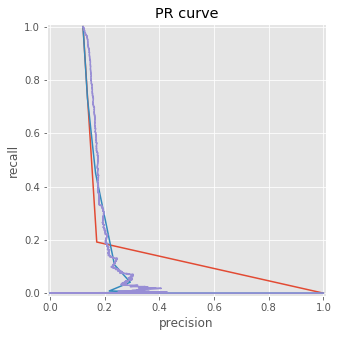

In [272]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(5, 5))
plt.plot(precision_dtc, recall_dtc)
plt.plot(precision_rfc, recall_rfc)
plt.plot(precision_lr, recall_lr)
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.title('PR curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

(-0.01, 1.01)

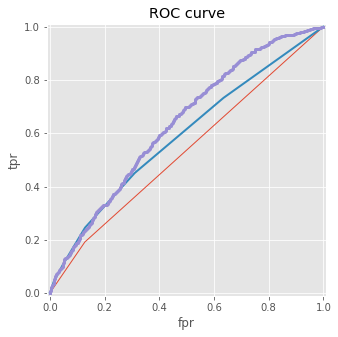

In [286]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

## Your Code Here
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict)
plt.figure(figsize=(5, 5))
plt.plot(fpr_dtc, tpr_dtc, label='dtc',linewidth=1)
plt.plot(fpr_rfc, tpr_rfc, linewidth=2)
plt.plot(fpr_lr, tpr_lr,linewidth=3)
# plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [274]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

## Your Code Here
rfc = RandomForestClassifier()
df_cv=df_preproc.drop(['TARGET'], axis=1)
df_cv=df_preproc.drop(['sample'], axis=1)
y=df_preproc['TARGET']
cross_val_score(
    rfc,
    df_cv,
    y,
    scoring='roc_auc',
    cv=10)

array([1.        , 0.99991882, 0.99999894, 1.        , 0.99996881,
       0.99999419, 0.99998097, 1.        , 0.99995613, 0.9999889 ])

In [288]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки


## Your Code Here
lr = LogisticRegression()
lr.fit(X_train, y_train)
predict_proba_lr = lr.predict_proba(X_Test) # взяли тетстовую выборку
print('LogisticRegression')
print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict),'\n')

LogisticRegression
precision 0.42857142857142855
recall 0.004918032786885246
accuracy 0.8783837579617835
f1 0.009724473257698542 



C:\Users\Kirill\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [289]:
# Померить roc_auc на тесте
roc_auc_score(y_Test, predict_proba_lr[:,1])

0.6168328267477204